In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x = np.array([[1,1], [2,1], [1,2], [1.5,1.5], [2,2], [2,5], [4,3], [7,2], [3,5], [2,6], [6,2], [3,4], [4,4]])
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x.shape

(13, 2)

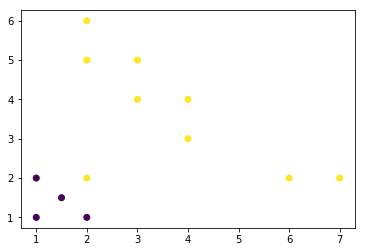

In [47]:
X_X1 = x[:, 0]
X_X2 = x[:, 1]
plt.scatter(X_X1, X_X2, c = y)
plt.show()

In [28]:
from sklearn import svm

In [59]:
svcLinear = svm.SVC(kernel='linear', C=1).fit(x, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.5, 0.5]]), array([-2.5]))

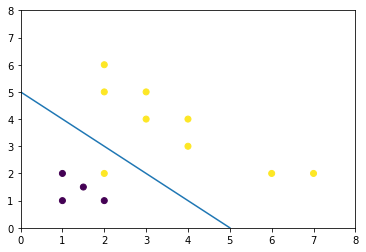

In [60]:
X1 = np.array([0, 5])
X2 = -1 * (svcLinear.intercept_ + svcLinear.coef_[0][0] * X1) / svcLinear.coef_[0][1]
plt.plot(X1, X2)
plt.scatter(X_X1, X_X2, c=y)
plt.axis([0, 8, 0, 8])
plt.show()

In [61]:
svcLinear = svm.SVC(kernel='linear', C=100).fit(x, y)
svcLinear.coef_, svcLinear.intercept_

(array([[2., 2.]]), array([-7.]))

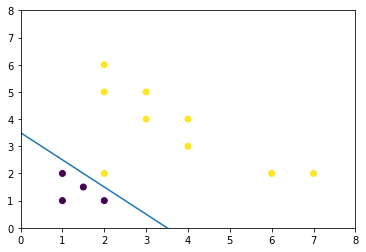

In [63]:
X1 = np.array([0, 5])
X2 = -1 * (svcLinear.intercept_ + svcLinear.coef_[0][0] * X1) / svcLinear.coef_[0][1]
plt.plot(X1, X2)
plt.scatter(X_X1, X_X2, c=y)
plt.axis([0, 8, 0, 8])
plt.show()

# SVM on Iris dataset

In [130]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [131]:
iris = datasets.load_iris()
# for plotting data in 2D
x = iris.data[:, 0:2]
y = iris.target

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [139]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [140]:
clf.score(x_test, y_test)

0.8157894736842105

In [141]:
# code for printing the plot
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min()-1, x1.max()+1
    x2_min, x2_max = x2.min()-1, x2.max()+1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

In [142]:
xx, yy = makegrid(x[:, 0], x[:, 1])

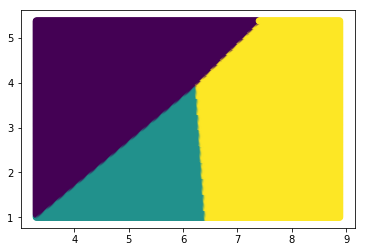

In [143]:
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c=predictions)
plt.show()

# Choosing good parameters

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [145]:
clf = KNeighborsClassifier()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [148]:
grid = {"n_neighbors":[3, 5, 7, 9, 11, 13, 15, 17, 19]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [150]:
abc.cv_results_

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

{'mean_fit_time': array([0.        , 0.        , 0.00034269, 0.        , 0.        ,
        0.00012771, 0.00017865, 0.00085688, 0.00033132]),
 'std_fit_time': array([0.        , 0.        , 0.00048463, 0.        , 0.        ,
        0.00018061, 0.00025266, 0.00060645, 0.00046856]),
 'mean_score_time': array([0.00458829, 0.        , 0.        , 0.        , 0.00563423,
        0.00078702, 0.00090408, 0.00134238, 0.00131313]),
 'std_score_time': array([0.00648882, 0.        , 0.        , 0.        , 0.00712019,
        0.00057637, 0.00068878, 0.00118481, 0.00164935]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15},
  {'n_neighbors': 17},
  {'n_

In [154]:
# for SVM
clf_svm = svm.SVC()
grid = {"C":[1e2, 1e3, 1e4, 5e3, 5e4, 1e5], 'gamma':[1e-2, 1e-3, 1e-4, 5e-4, 5e-3]}
abc_svm = GridSearchCV(clf_svm, grid)
abc_svm.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100.0, 1000.0, 10000.0, 5000.0, 50000.0, 100000.0], 'gamma': [0.01, 0.001, 0.0001, 0.0005, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [155]:
abc_svm.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [158]:
abc_svm.cv_results_

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

{'mean_fit_time': array([0.00000000e+00, 2.88287799e-03, 0.00000000e+00, 6.95546468e-04,
        0.00000000e+00, 3.33309174e-04, 3.32434972e-04, 0.00000000e+00,
        1.50203705e-05, 0.00000000e+00, 2.10030874e-03, 3.33229701e-04,
        6.88393911e-04, 3.34819158e-04, 0.00000000e+00, 3.32673391e-04,
        3.19163005e-04, 3.33388646e-04, 6.65823619e-04, 6.36736552e-04,
        9.96907552e-04, 3.27984492e-04, 0.00000000e+00, 0.00000000e+00,
        1.23270353e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.31083934e-04]),
 'std_fit_time': array([0.00000000e+00, 3.02465421e-03, 0.00000000e+00, 9.83651248e-04,
        0.00000000e+00, 4.71370354e-04, 4.70134046e-04, 0.00000000e+00,
        2.12420116e-05, 0.00000000e+00, 2.95714503e-03, 4.71257962e-04,
        4.86768002e-04, 4.73505794e-04, 0.00000000e+00, 4.70471221e-04,
        4.51364650e-04, 4.71482745e-04, 4.70808557e-04, 4.52181869e-04,
        2.59232623e-06, 4.63840117e-04, 0.00000000e+00, 0.000

# SVM as regressor

In [161]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x.shape, y.shape

((506, 13), (506,))

In [162]:
regressor = svm.SVR()
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [163]:
regressor.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [165]:
regressor.score(x_test, y_test)

0.02836280992993545

In [167]:
# for SVM
clf_svm = svm.SVR()
grid = {"C":[1e2, 1e3, 1e4, 5e3, 5e4, 1e5], 'gamma':[1e-2, 1e-3, 1e-4, 5e-4, 5e-3]}
abc_svm = GridSearchCV(clf_svm, grid)
abc_svm.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100.0, 1000.0, 10000.0, 5000.0, 50000.0, 100000.0], 'gamma': [0.01, 0.001, 0.0001, 0.0005, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
abc_svm.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [173]:
regressor = svm.SVR(C=10000, gamma=0.00001)

In [174]:
regressor.fit(x_train, y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [175]:
regressor.score(x_test, y_test)

0.7135150855068784